In [1]:
# Data Cleaning
# EDA
# Text Preprocessing
# Model building
# Evaluation
# Improvement
# Website 
# Deploy

In [3]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

#### Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(2)

,target,text
1664,ham,ÌÏ v ma fan...
667,ham,This pay is &lt;DECIMAL&gt; lakhs:)


#### Changing target column

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### checking null value

In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# checking duplicate
df.duplicated().sum()

403

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

#### EDA

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

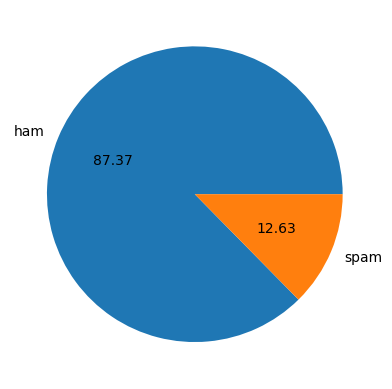

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shailendra.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# we will count number of words 
# no. of character 
# no of sentences

In [23]:
df = df.assign(num_character=df['text'].apply(len))

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shailendra.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
df=df.assign(num_word=df['text'].apply(lambda x : len(nltk.word_tokenize(x))))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\shailendra.kumar/nltk_data'
    - 'c:\\Users\\shailendra.kumar\\AppData\\Local\\anaconda3\\nltk_data'
    - 'c:\\Users\\shailendra.kumar\\AppData\\Local\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\shailendra.kumar\\AppData\\Local\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\shailendra.kumar\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
df=df.assign(num_sentence=df['text'].apply(lambda x : len(nltk.sent_tokenize(x))))

In [ ]:
df.head()

,target,text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_character','num_word','num_sentence']].describe()

,num_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
df[df['target']==0][['num_character','num_word','num_sentence']].describe()

KeyError: "['num_word', 'num_sentence'] not in index"

In [ ]:
df[df['target']==1][['num_character','num_word','num_sentence']].describe()

,num_character,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


From analysis we find that spam messages has more length than ham

In [26]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

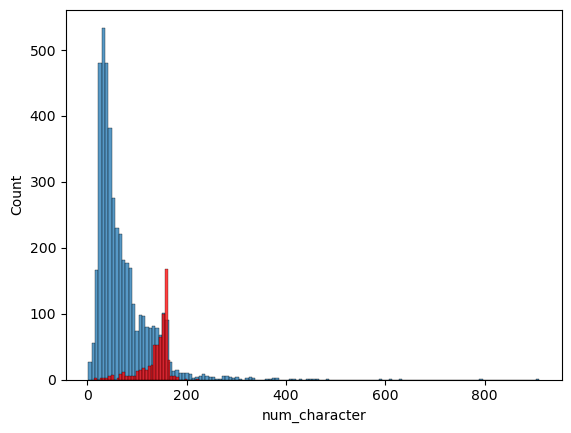

In [27]:
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')


In [28]:
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')


KeyError: 'num_word'

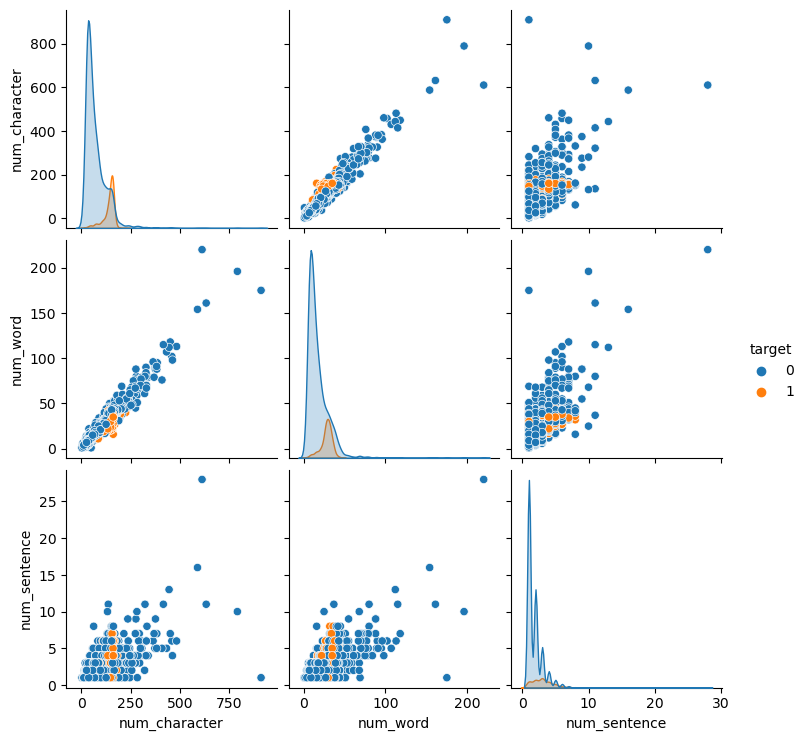

In [ ]:
sns.pairplot(df,hue='target')

C:\Users\shailendra.kumar\AppData\Local\Temp\ipykernel_13764\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

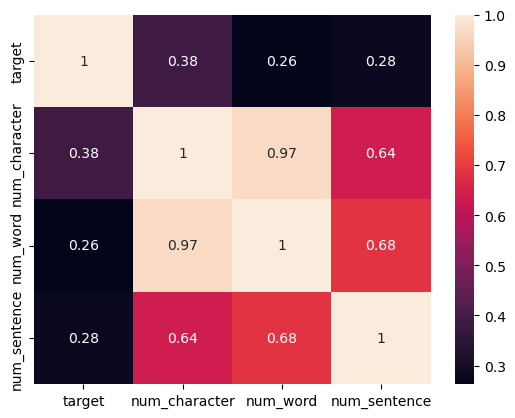

In [ ]:
sns.heatmap(df.corr(),annot=True)

#### Text preprocessing

1. Lower case
2. Tokenization
3. Removing special character
4. Removing special character
5. stemming

In [29]:
## Creating function Transform text

import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [30]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [31]:
transform_text(df['text'][10])

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\shailendra.kumar/nltk_data'
    - 'c:\\Users\\shailendra.kumar\\AppData\\Local\\anaconda3\\nltk_data'
    - 'c:\\Users\\shailendra.kumar\\AppData\\Local\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\shailendra.kumar\\AppData\\Local\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\shailendra.kumar\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [32]:
df['transformed_text']=df['text'].apply(transform_text)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\shailendra.kumar/nltk_data'
    - 'c:\\Users\\shailendra.kumar\\AppData\\Local\\anaconda3\\nltk_data'
    - 'c:\\Users\\shailendra.kumar\\AppData\\Local\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\shailendra.kumar\\AppData\\Local\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\shailendra.kumar\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [33]:
df.head(2)

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


#### wordcloud of Spam and Ham message

In [34]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [35]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

KeyError: 'transformed_text'

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

NameError: name 'spam_wc' is not defined

<Figure size 1500x600 with 0 Axes>

In [37]:
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

KeyError: 'transformed_text'

In [38]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

KeyError: 'transformed_text'

In [45]:
len(spam_corpus)

9939

In [46]:
from collections import Counter


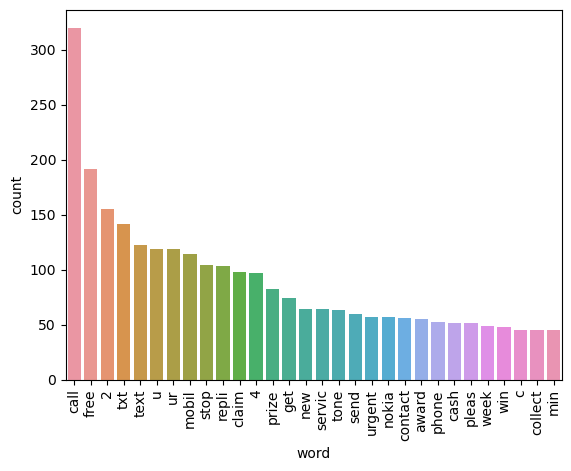

In [47]:
word_counts = Counter(spam_corpus).most_common(30)
df1 = pd.DataFrame(word_counts, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df1)
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
    

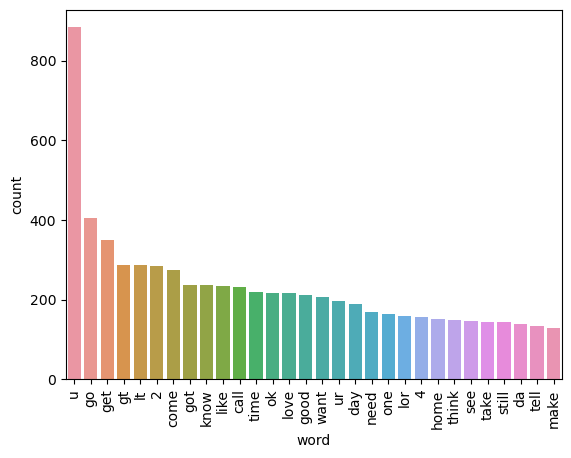

In [51]:
word_counts = Counter(ham_corpus).most_common(30)
df2 = pd.DataFrame(word_counts, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df2)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df.head()

,target,text,num_character,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### Model Building

In [54]:
### Bagofwords

In [43]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [44]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [45]:
X.shape

(5169, 3000)

In [46]:
y=df['target'].values
y.shape

(5169,)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [52]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [53]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [55]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [56]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [57]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [58]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [59]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9572649572649573


In [60]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [61]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.970019,0.957265
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [62]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

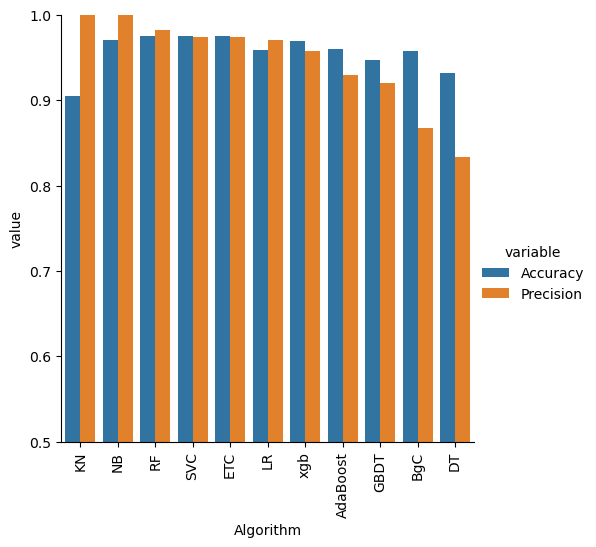

In [63]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [64]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [65]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [66]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [67]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [68]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [69]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.970019,0.957265,0.970019,0.957265,0.970019,0.957265,0.970019,0.957265
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188


In [70]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [71]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [72]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [73]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [74]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [75]:
from sklearn.ensemble import StackingClassifier

In [76]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))